In [142]:
# import matplotlib
# matplotlib.use('Agg')
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error     


In [176]:
class RigeRegression:
    def __init__(self, X, y, lmda):
        I = np.eye(X.shape[1])
        I[0, 0] = 0
        self.X = X
        self.XT = self.X.T
        self.y = y
        self.I = I
        self.lmda = lmda
        self.weights = None

    def fit(self):
        self.weights = np.dot(np.linalg.inv(np.dot(self.XT, self.X) + self.lmda * self.I), np.dot(self.XT, self.y))

    def predict(self, X):
        return np.dot(X, self.weights)

In [177]:
def load_data(filename):
    data = np.loadtxt(filename, skiprows=1, delimiter=',')
    print "Input Data Shape:{}".format(data.shape)
    cols = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    X = data[:, cols]
    y = data[:, 10:11]
    return X, y

In [146]:
def s_ridge(X, y):
    error = []
    for i in range(0, 150):
        clf = linear_model.Ridge(alpha=i)
        clf.fit(X, y)
        y_predictions = clf.predict(X)
        error.append(mean_squared_error(y, y_predictions))
    # print error
    return error

In [148]:
def ridge(X,y,lamda):
    X= np.hstack((np.ones((X.shape[0], 1)), X))
#     print X.shape
    I = np.eye(X.shape[1])
    I[0, 0] = 0 
#     print I
#     print I.shape
    weights =  np.dot(np.linalg.inv(np.dot(X.T, X) + lamda*I),np.dot(X.T, y))
    return np.dot(X,weights)

Input Data Shape:(49, 101)


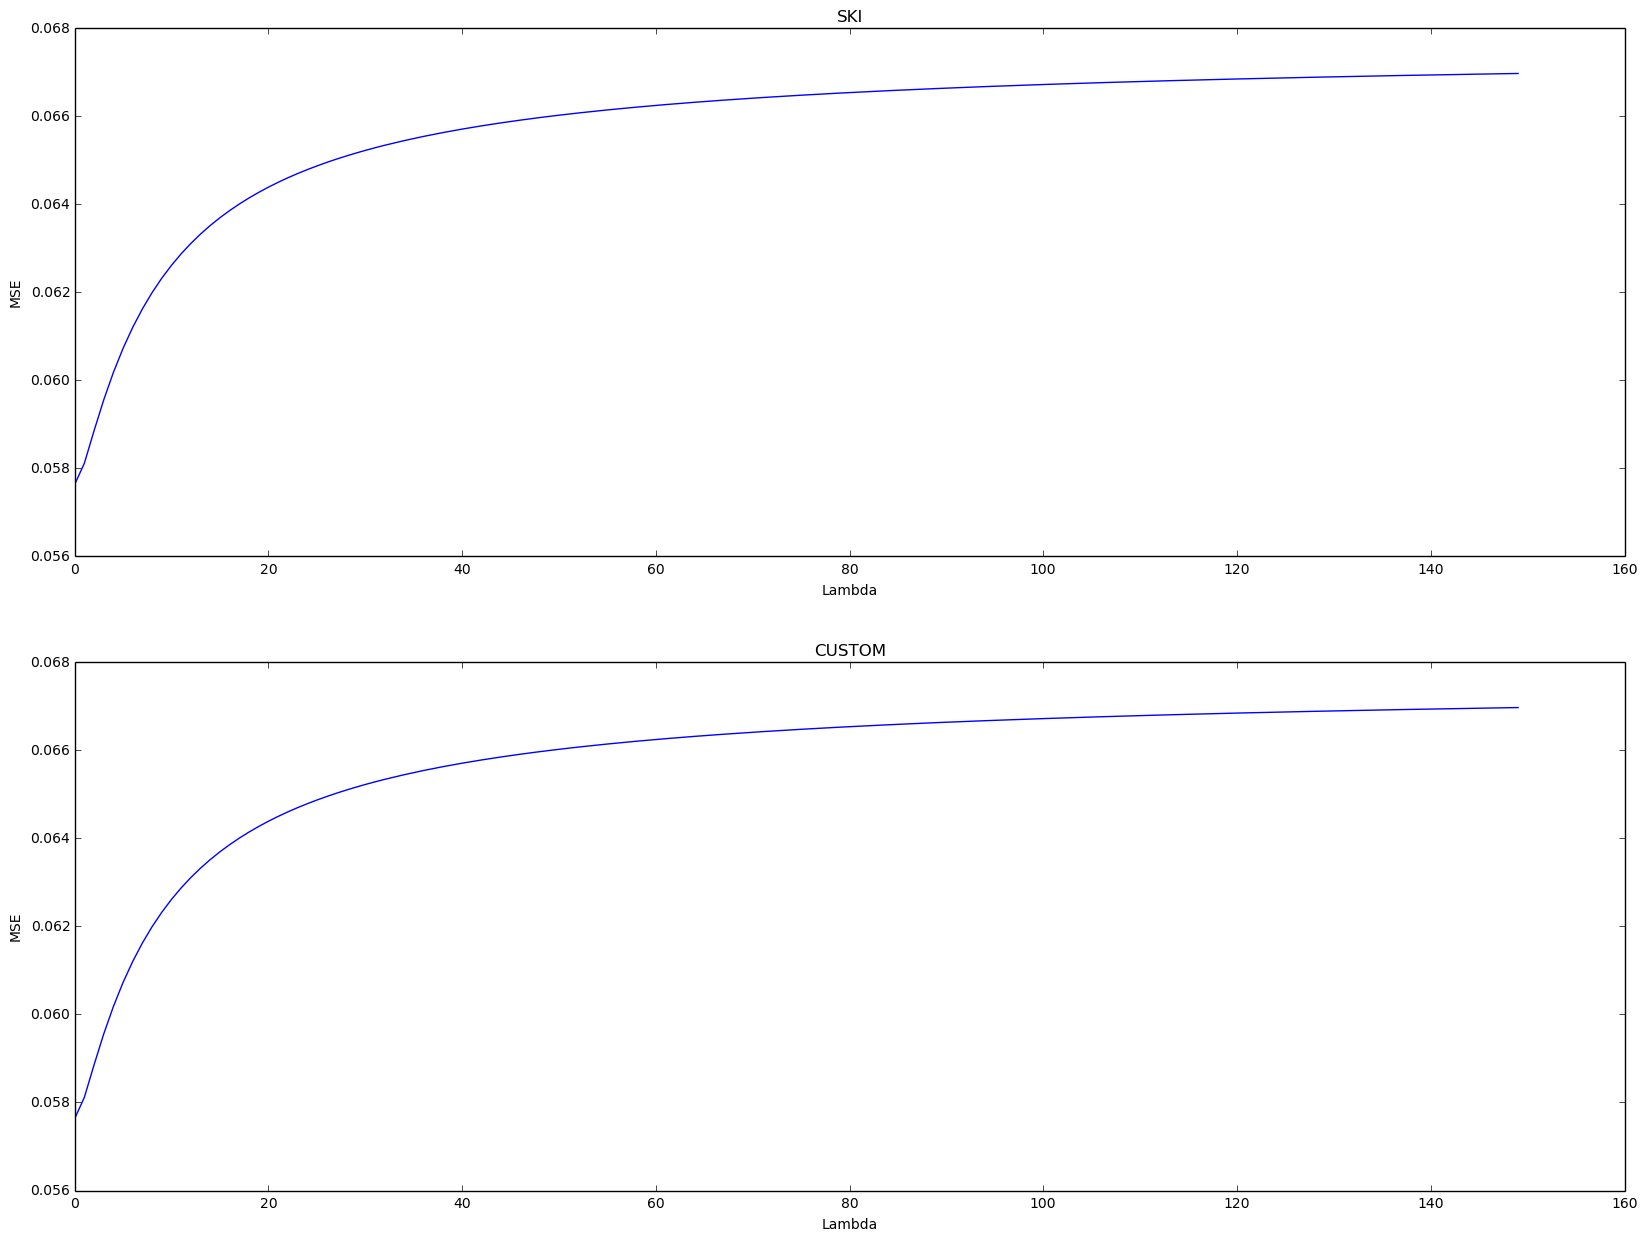

In [179]:
X, y = load_data('data/train-50(1000)-100.csv')
s_ridge(X,y)
error = []
for i in range(150):
    error.append(np.mean((ridge(X,y,i)-y)**2))
# print error
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
    
ax1.plot(np.arange(150), s_ridge(X, y))
ax1.set_xlabel("Lambda")
ax1.set_ylabel("MSE")
ax1.set_title("SKI")

ax2.plot(np.arange(150), error)
ax2.set_xlabel("Lambda")
ax2.set_ylabel("MSE")
ax2.set_title("CUSTOM")

plt.show()
# print y_predict.shape
